### Desenvolva as etapas a seguir utilizando o Jupyter ou Colab

 - A imagem resultante da última questão deve ser entregue na questão no forms
 - Para a importação da imagem funcionar o aquivo do Jupyter e a imagem png deve estar na mesma pasta. Caso esteja usando o Google Colab ou similar é necessário fazer o upload da imagem nos arquivos.

### Importações

```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
```

### Exibição de imagens

#### Uma imagem
```
plt.imshow(img1)
``` 

#### Duas imagens
```

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.subplot(2, 2, 2)
plt.imshow(img2)
```


### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

### Escalonamento com nearest neighbor

```
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```

### Cisalhamento

```
img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = int(j + cx * i)
        new_y = int(cy * j + i)
        
        img_shear[new_y, new_x] = img[i, j]
```

### Imagem grayscale para imagem binária de 3 canais

``` 
bin = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
for i in range(l):
    for j in range(c):
        for k in range(3):
            if img[i,j] > thresh: 
                bin[i,j,k] = 255 
            else: 
                bin[i,j,k] = 0

```
### Reflexão 


#### Alt1
```
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        mario_refl[new_y, new_x] = mario[i, j]
```

#### Alt2
```
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
mario_refl[::1, ::-1] = mario
```


1 - Importe as bibliotecas que serão usadas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

2 - Abra a imagem "baby.png", transforme-a em array do numpy, retire o canal alpha se necessário e exiba para ver o resultado

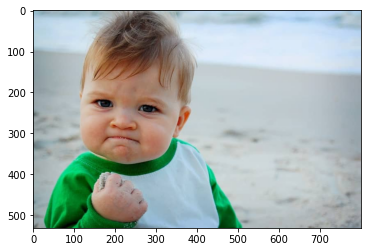

In [2]:
img = Image.open('baby.png')
img = np.array(Image.open('baby.png'))
img = img[:, :, :3]
(l,c,p) = img.shape
plt.imshow(img)

3 - Aplique o cisalhamento **na imagem da questão 2** com os parametros cx = 0.3 e cy = 0.2. Exiba o resultado.

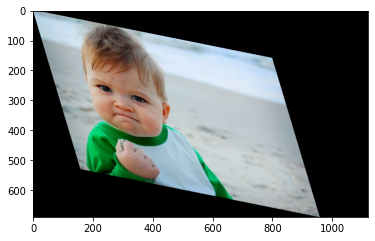

In [4]:
cx, cy = 0.3, 0.2
img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = int(j + cx * i)
        new_y = int(cy * j + i)

        img_shear[new_y, new_x] = img[i, j]

plt.imshow(img_shear)

4 - Aplique algum método grayscale **na imagem resultante da questão 3** e exiba o resultado.

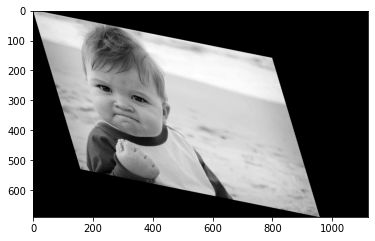

In [5]:
def metodo_grayscale(img):
    (l, c, p) = img.shape

    img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(img[i, j, 0])
            g = float(img[i, j, 1])
            b = float(img[i, j, 2])
        
            img_avg[i, j] = (r + g + b) / 3
            
    return img_avg
        
img_gray = metodo_grayscale(img_shear)
plt.imshow(img_gray, cmap = 'gray')

5 - Salve a imagem **resultante da questão 4** com o nome "resultado_np3.png", envie essa imagem resultante na tarefa do forms.

In [7]:
Image.fromarray(img_gray).save('resultado_np3.png')